# **PARTICIPACIÓN EN CLASE [11]**
## Resolución Prueba 02
---

+ **Nombre:** Michael Enríquez
+ **Fecha:** Jueves 23 de enero, 2025
+ **Curso:** Métodos Númericos GR1CC

---

## Mínimos Cuadrados


* **Interpole los siguientes conjuntos de datos con la función correspondiente.** 

In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from src import ajustar_min_cuadrados  # no modificar esta función
import numpy as np
import matplotlib.pyplot as plt

### **CONJUNTO DE DATOS 1**

In [83]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

*Interpolación de la serie de puntos:*

In [85]:
from sympy import symbols, Eq, solve


def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:

    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)

    return (c_2, c_1, c_0, c_ind)


def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:

    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))

    return (c_2, c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(xi**2 * yi for xi, yi in zip(xs, ys))

    return (c_2, c_1, c_0, c_ind)


pars1 = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

x = symbols('x')
equation = Eq(pars1[0] * x**2 + pars1[1] * x + pars1[2], 2.25)
solutions = solve(equation, x)
for solution in solutions:
    print(f"x = {solution.evalf()}")

[01-22 15:50:11][INFO] Se ajustarán 3 parámetros.
[01-22 15:50:11][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-22 15:50:11][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
x = -0.948805441087225
x = 1.50369543945971


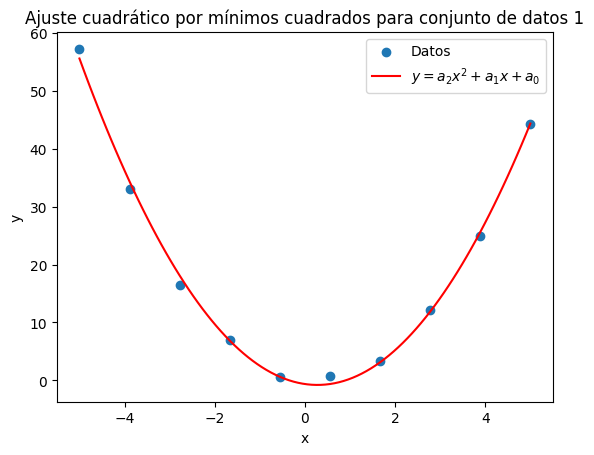

In [86]:
x1 = np.linspace(-5, 5, 100)
y1 = [pars1[0] * xi**2 + pars1[1] * xi + pars1[2] for xi in x1]

plt.scatter(xs1, ys1, label="Puntos")
plt.plot(x1, y1, color="red", label="Interpolación cuadrática")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [71]:

def cuadratica(x, pars):
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0
# Implementación para ajustar mínimos cuadrados
def ajustar_min_cuadrados(xs, ys):
    # Matriz A para el ajuste cuadrático
    A = np.vstack([np.square(xs), xs, np.ones(len(xs))]).T
    pars, _, _, _ = np.linalg.lstsq(A, ys, rcond=None)
    return pars
# Ajustar los datos
pars = ajustar_min_cuadrados(xs1, ys1)
# Coeficientes del ajuste cuadrático
a2, a1, a0 = pars

# Calcular y(2.25) y y(-2.25) usando la función cuadrática ajustada
y_2_25 = cuadratica(2.25, pars)
y_neg_2_25 = cuadratica(-2.25, pars)

# Mostrar resultados
print(f"a2 = {a2}")
print(f"a1 = {a1}")
print(f"a0 = {a0}")
print(f"y(2.25) = {y_2_25}")
print(f"y(-2.25) = {y_neg_2_25}")

a2 = 2.024410482925084
a1 = -1.1233251295755444
a0 = -0.6382556172537845
y(2.25) = 7.0828409110094785
y(-2.25) = 12.137803994099427


## **Conjunto de datos 2**

In [94]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

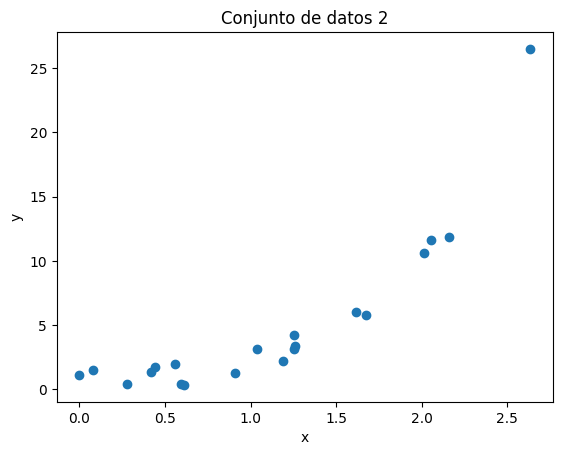

In [95]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

¿Cuál es la función idónea para interpolar estos puntos?

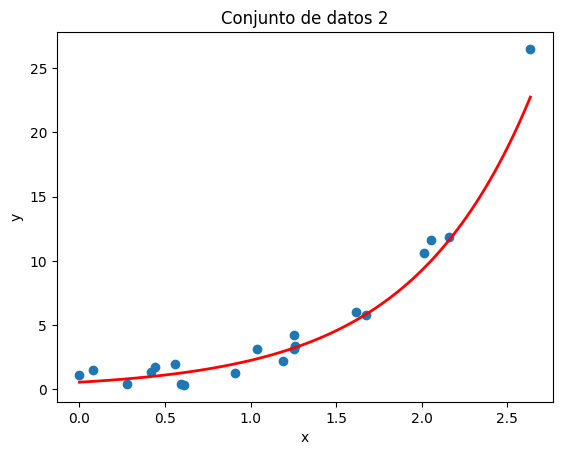

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función exponencial
def exponencial(x, pars):
    a, b = pars
    return a * np.exp(b * x)

# Ajustar mínimos cuadrados para función exponencial
def ajustar_exponencial(xs, ys):
    # Linealizar el problema: ln(y) = ln(a) + b * x
    log_ys = np.log(ys)
    A = np.vstack([xs, np.ones(len(xs))]).T
    b, log_a = np.linalg.lstsq(A, log_ys, rcond=None)[0]
    a = np.exp(log_a)
    return a, b

# Ajustar los datos al modelo exponencial (xs y ys definidos externamente)
pars = ajustar_exponencial(xs2, ys2)

# Generar puntos para la curva ajustada
x = np.linspace(min(xs2), max(xs2), 100)
y = exponencial(x, pars)

# Graficar ajuste exponencial
plt.plot(x, y, color="red", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación: Conjunto de datos 2")
plt.show()

In [100]:
# Calcular y(5) y y(1) usando la función exponencial ajustada

a, b = pars

y_5 = exponencial(5, pars)
y_1 = exponencial(1, pars)

print(f"a = {a}")
print(f"b = {b}")
print(f"y(5) = {y_5}")
print(f"y(1) = {y_1}")

a = 0.5440855388147082
b = 1.4171603667055415
y(5) = 650.1174439111649
y(1) = 2.2445646053759507
